In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('Tweets.csv')

In [3]:
# Combine all tweets into a single string
text = ' '.join(tweet for tweet in df['text'])

In [4]:
# Generate the word cloud image
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

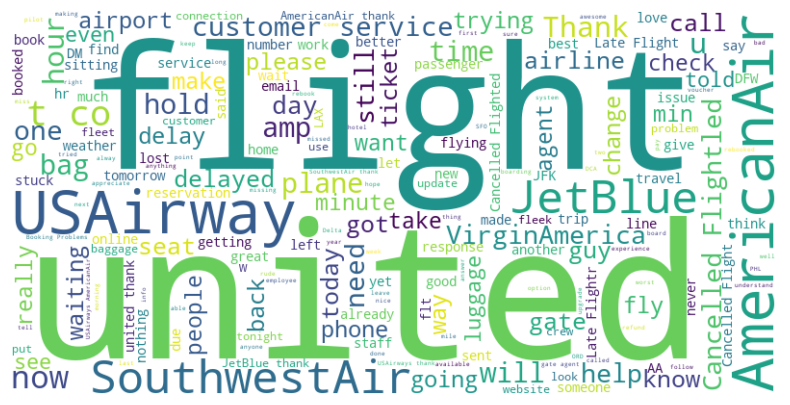

In [5]:
# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove the axis
plt.show()

In [ ]:
# Airline Sentiment Data from Kaggle
https://www.kaggle.com/datasets/welkin10/airline-sentiment?resource=download

In [6]:
# Load the dataset
data = pd.read_csv('aircrashesFullData.csv')

# Explore the structure, column names, and data types
print("Column Names:")
print(data.columns)

print("\nData Types:")
print(data.dtypes)

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Decide how to handle missing data
# You can choose to drop rows with missing values or impute them depending on your analysis needs.
# For example, to drop rows with missing values:
data_clean = data.dropna()

Column Names:
Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator',
       'Sum of Ground', 'Sum of Fatalities (air)', 'Sum of Aboard'],
      dtype='object')

Data Types:
Year                        int64
Quarter                    object
Month                      object
Day                         int64
Country/Region             object
Aircraft Manufacturer      object
Aircraft                   object
Location                   object
Operator                   object
Sum of Ground               int64
Sum of Fatalities (air)     int64
Sum of Aboard               int64
dtype: object

Missing Values:
Year                         0
Quarter                      0
Month                        0
Day                          0
Country/Region             230
Aircraft Manufacturer        0
Aircraft                     0
Location                     0
Operator                   234
Sum of Ground                0
Sum o

In [8]:
data_clean = data.dropna(subset=['Country/Region', 'Operator'])

In [9]:
data['Country/Region'].fillna("Unknown", inplace=True)
data['Operator'].fillna("Unknown", inplace=True)

In [13]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 9.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.7/18.7 MB 11.1 MB/s eta 0:00:0000:0100:01


/var/folders/xy/3mfl4jgj3zn3d0zk383dltb00000gp/T/ipykernel_32792/1006581607.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


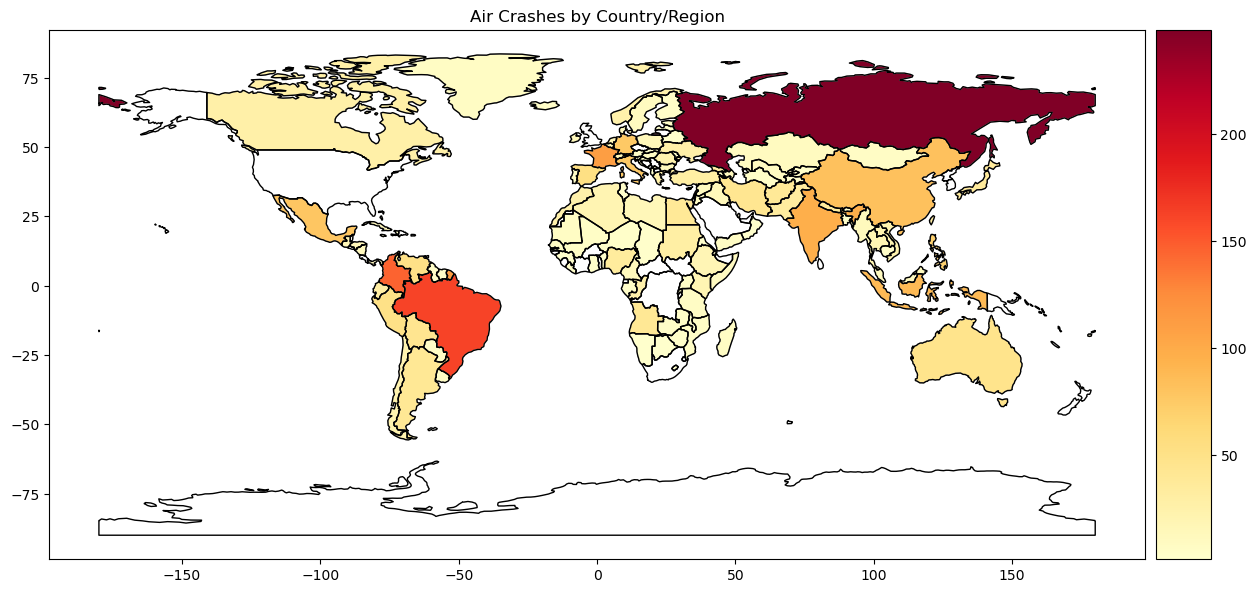

In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the crash dataset
data = pd.read_csv('aircrashesFullData.csv')

# Group data by 'Country/Region' and count crashes
crashes_per_country = data['Country/Region'].value_counts().reset_index()
crashes_per_country.columns = ['Country/Region', 'CrashCount']

# Load world geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge crash data with world map data
merged_data = world.merge(crashes_per_country, left_on='name', right_on='Country/Region', how='left')

# Create the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_title('Air Crashes by Country/Region')

# Plot world map boundaries
world.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot crash data
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merged_data.plot(column='CrashCount', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

# Show the map
plt.show()

In [33]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
# Load the dataset
df = pd.read_csv('AirlineOccurences.csv')

In [30]:
# Remove leading and trailing whitespace in all features
df['Report'] = df['Report'].str.strip()
df['Part Failure'] = df['Part Failure'].str.strip()
df['Occurence Nature condition'] = df['Occurence Nature condition'].str.strip()
df['Occurence Precautionary Procedures'] = df['Occurence Precautionary Procedures'].str.strip()

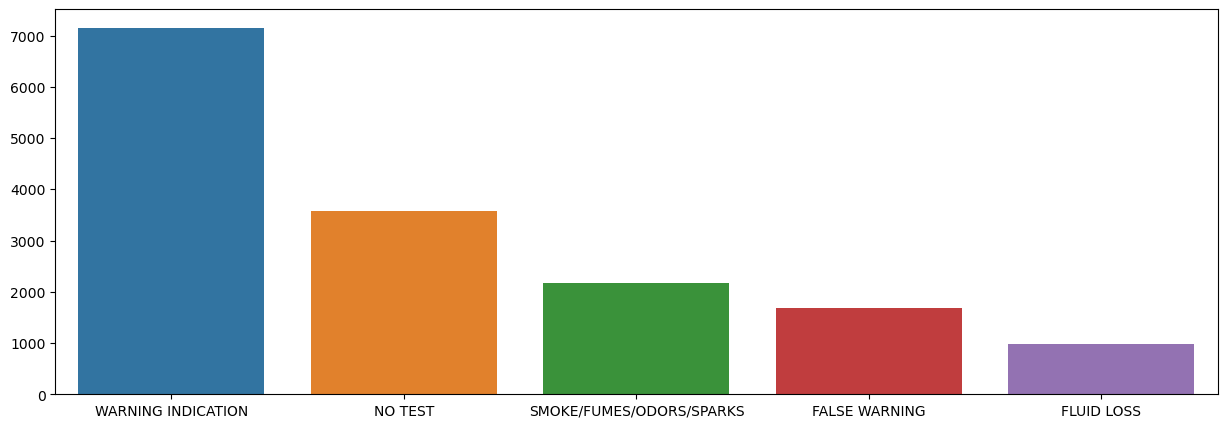

In [34]:
# Count the frequency of each unique value in the 'Occurence Nature condition' column
nature_counts = df['Occurence Nature condition'].value_counts()

# Plot a histogram of the 'Part Failure' column
fig = plt.figure(figsize=(15, 5))
# Select the top 10 values and plot the resulting DataFrame
top_nature_counts = nature_counts[nature_counts.index != 'OTHER'][:5]
sns.barplot(x=top_nature_counts.index, y=top_nature_counts.values)
plt.show()

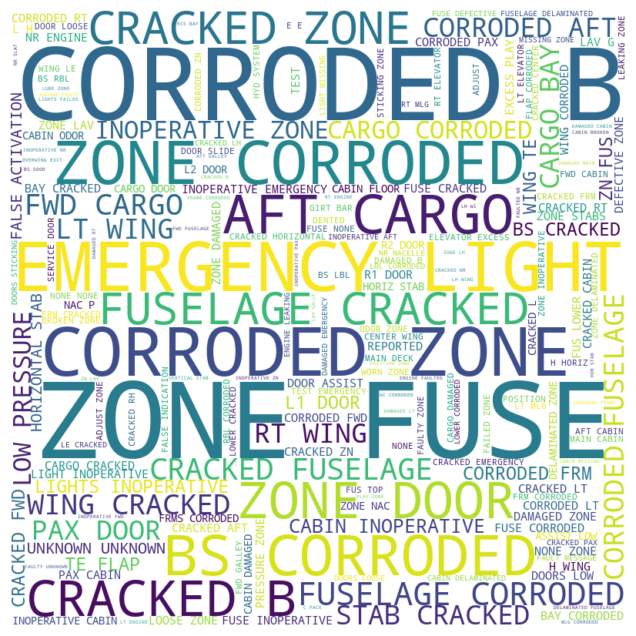

In [35]:
# Create a word cloud of the 'Part Failure' column
from wordcloud import WordCloud
text = ' '.join(df['Part Failure'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

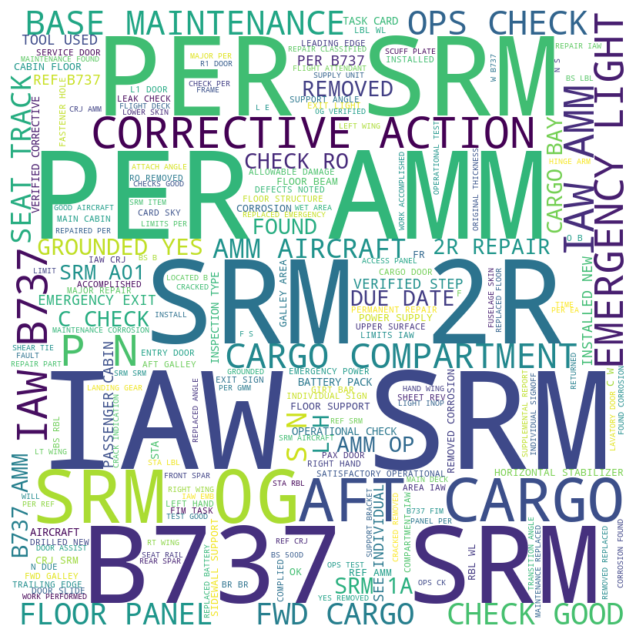

In [36]:
# Create a word cloud of the 'Part Failure' column
from wordcloud import WordCloud
text = ' '.join(df['Report'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

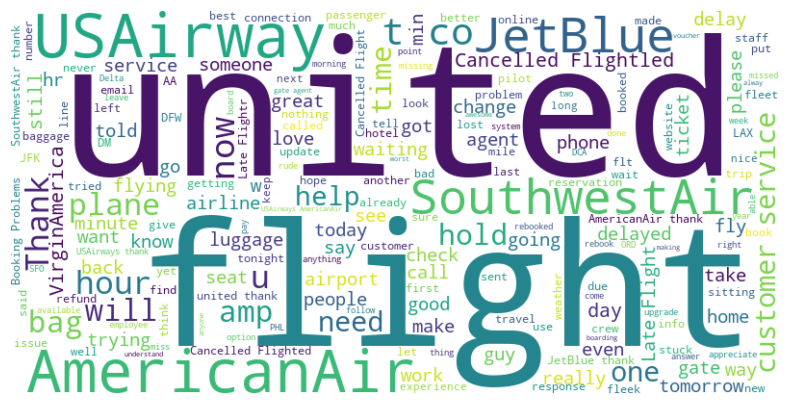

In [37]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Tweets.csv')  # Replace with the path to your CSV file

# Combine all tweets into a single string
text = ' '.join(tweet for tweet in df['text'])  # Assuming 'text' is the column with the tweet text

# Generate the word cloud image
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove the axis
plt.show()